# Import libralies

In [ ]:
import numpy as np
import math

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Age Vs Salary Classification either obove 50k or less 50k through logistic regression classification

Reference of data set: https://www.kaggle.com/wenruliu/adult-income-dataset

![](https://miro.medium.com/max/668/0*g0SY0MVS41m_Yma_.png)

In [ ]:
df = pd.read_csv(r'https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/adult_data/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
list_feature_cate = ['workclass', 'education',  'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
list_feature_num = ['age',	'fnlwgt',	'educational-num',	'capital-gain',	'capital-loss',	'hours-per-week']

# Pre-processing

Cleansing data

In [ ]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [ ]:
df=df[~df.duplicated()]

# df.replace('?', np.nan, inplace=True)
# df.dropna(inplace=True)  

Convert target  to numeric

In [ ]:
LE = LabelEncoder()
df['income'] = LE.fit_transform(df['income'])

Interpolate missing Data


In [ ]:
df[(df[df.columns].values == '?')]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,0
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,0
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,0
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,0
48823,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,0


Find best corr feature for interpolate data

In [ ]:
df.replace('?', np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        45995 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       45985 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   47934 non-null  object
 14  income           48790 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 6.0+ MB


In [ ]:
for feature in list_feature_cate:
    df[feature+'_cate'] = df[feature].astype('category').cat.codes

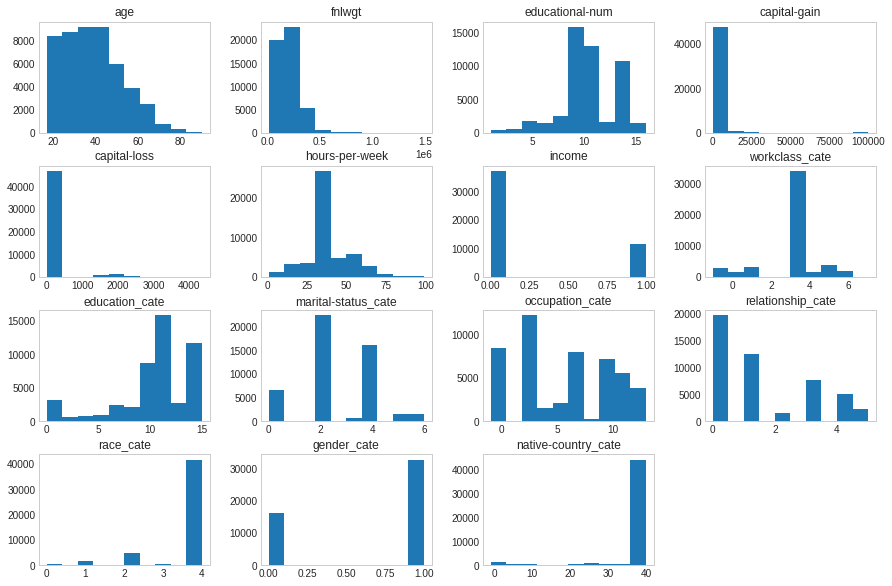

In [ ]:
df.hist(bins=10,figsize=(15,10),grid=False);

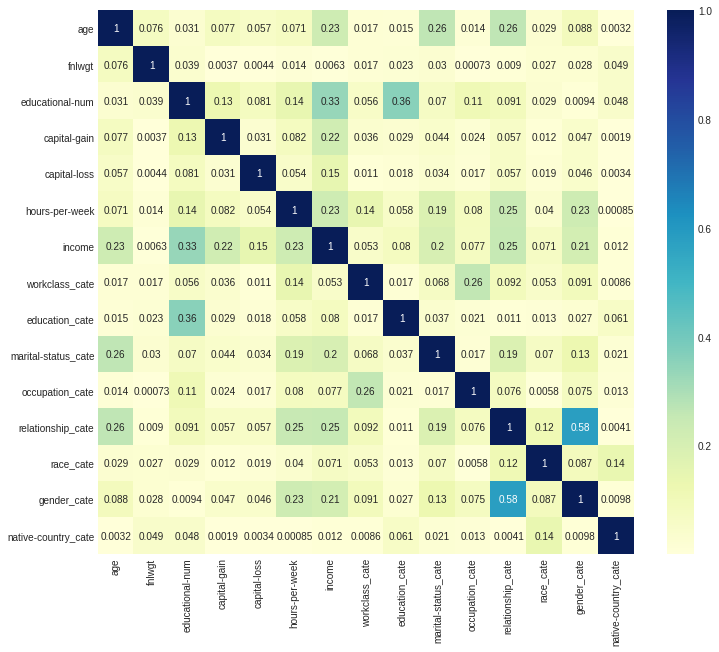

In [ ]:
plt.figure(figsize=(12,10))
cor = abs(df.corr())
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

In [ ]:

for feature in list_feature_cate:
    feature_cate = feature + '_cate'
    best_corr = cor[feature_cate][cor[feature_cate] != 1 ].nlargest(n=1).index[0]
    

    for index, df_grp in df.groupby(best_corr):
        if  len(df.loc[ (df[feature].isnull()) & (df[best_corr] == index), feature]) == 0:
            continue
        print(f'interpolate {feature} by {best_corr}, value {index}.')
        try:
            filled_value = df[ (df[best_corr] == index) ][feature].value_counts().nlargest(n=1).index[0]
            df.loc[ (df[feature].isnull()) & (df[best_corr] == index), feature] = filled_value
        except:
            filled_value = df[feature].value_counts().nlargest(n=1).index[0]
            df.loc[ (df[feature].isnull()) & (df[best_corr] == index), feature] = filled_value
        # print(filled_value)

interpolate workclass by occupation_cate, value -1.
interpolate occupation by workclass_cate, value -1.
interpolate occupation by workclass_cate, value 2.
interpolate native-country by race_cate, value 1.
interpolate native-country by race_cate, value 2.
interpolate native-country by race_cate, value 3.
interpolate native-country by race_cate, value 4.


In [ ]:
for feature in list_feature_cate:
    df.drop([feature+'_cate'], inplace=True, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 6.0+ MB


# Feature Engineering

### Orderd/Non-ordered Data 

#### Eduction

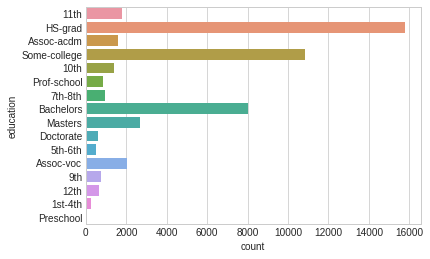

In [ ]:
sns.countplot(y="education", data=df)

In [ ]:
df.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

Not graduate, graduated, prof.

In [ ]:
education_scale = { 
    'Preschool':'LowGrad',
    '1st-4th':'LowGrad',
    '5th-6th':'LowGrad',
    '7th-8th':'LowGrad',  
    '9th':'LowGrad',
    '10th':'LowGrad',
    '11th':'LowGrad',
    '12th':'LowGrad', 
    'HS-grad':'MedGrad',
    'Prof-school':'MedGrad', 
    'Assoc-acdm':'HighGrad', 
    'Assoc-voc':'HighGrad', 
    'Some-college':'HighGrad', 
    'Bachelors':'Bachelors', 
    'Masters':'Masters', 
    'Doctorate':'Doctorate'
}
df['education'] = df['education'] .apply(lambda x: education_scale[x])

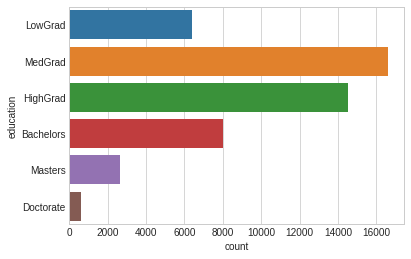

In [ ]:
sns.countplot(y="education", data=df)

#### marital-status

not married becaues not ready, not enough income

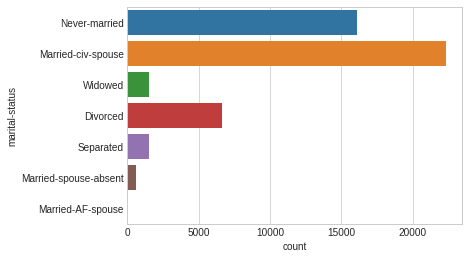

In [ ]:
sns.countplot(y='marital-status', data=df)

In [ ]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [ ]:
# marital_scale = { 
#     'Never-married':'NotMarried',
#     'Married-civ-spouse':'Married',
#     'Widowed':'Married',
#     'Divorced':'Married',  
#     'Separated':'Married',
#     'Married-spouse-absent':'Married',
#     'Married-AF-spouse':'Married'
# }
# df['marital-status'] = df['marital-status'].apply(lambda x: marital_scale[x])

In [ ]:
marital_scale = { 
    'Never-married':'NotMarried',
    'Married-civ-spouse':'Married',
    'Widowed':'NotMarried',
    'Divorced':'NotMarried',  
    'Separated':'NotMarried',
    'Married-spouse-absent':'NotMarried',
    'Married-AF-spouse':'Married'
}
df['marital-status'] = df['marital-status'].apply(lambda x: marital_scale[x])

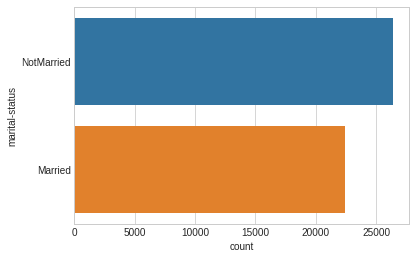

In [ ]:
sns.countplot(y="marital-status", data=df)

#### occupation

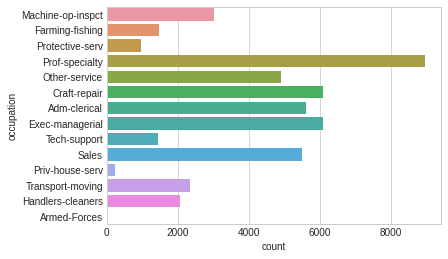

In [ ]:
sns.countplot(y='occupation', data=df)

In [ ]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Prof-specialty', 'Other-service', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [ ]:
# occupation_scale = { 
#     'Machine-op-inspct':'eng',
#     'Farming-fishing':'selfs',
#     'Protective-serv':'service',
#     'Prof-specialty':'Prof-specialty',  
#     'Other-service':'service',
#     'Craft-repair':'Craft-repair',
#     'Adm-clerical':'Adm-clerical',
#     'Exec-managerial':'Exec-managerial',
#     'Tech-support':'eng',
#     'Sales':'Sales',
#     'Priv-house-serv':'service',  
#     'Transport-moving':'selfs',
#     'Handlers-cleaners':'service',
#     'Armed-Forces':'Armed-Forces',
# }

# df['occupation'] = df['occupation'].apply(lambda x: occupation_scale[x])

In [ ]:
# sns.countplot(y="occupation", data=df)

#### Workclass

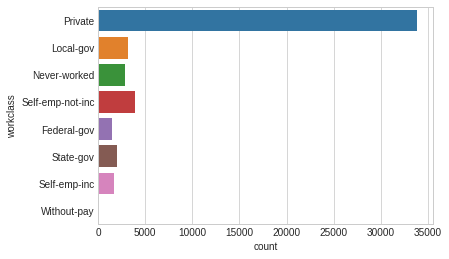

In [ ]:
sns.countplot(y='workclass', data=df)

#### hours-per-week

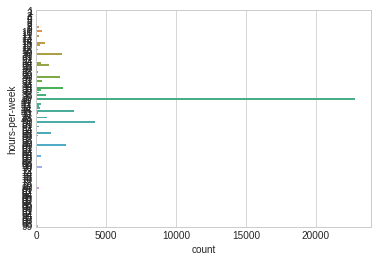

In [ ]:
sns.countplot(y='hours-per-week', data=df)

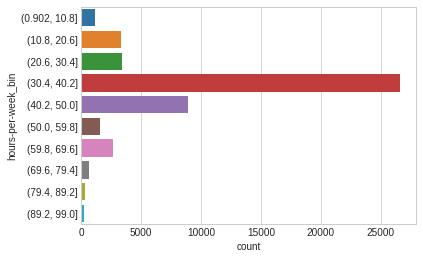

In [ ]:
df['hours-per-week_bin'] = pd.cut(df['hours-per-week'], 10)
# df['hours-per-week'] = df['hours-per-week'] 

sns.countplot(y="hours-per-week_bin", data=df);

#### native-country

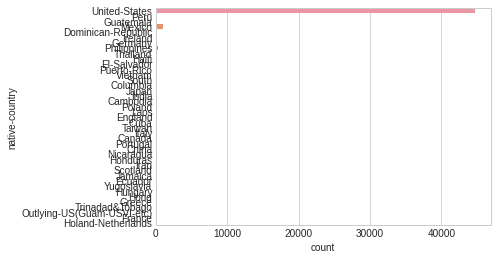

In [ ]:
sns.countplot(y='native-country', data=df)

In [ ]:
df.drop('native-country', axis=1, inplace=True)

#### age


In [ ]:
df['age_bin'] = pd.cut(df['age'], 20)

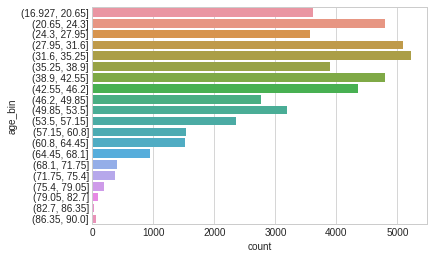

In [ ]:
sns.countplot(y='age_bin', data=df)

### Crossing feature

capital

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


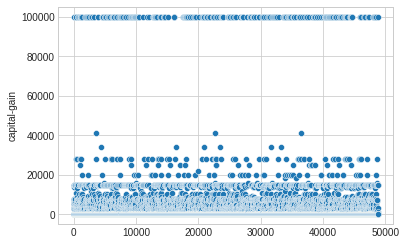

In [ ]:
sns.scatterplot(df.index, df['capital-gain'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


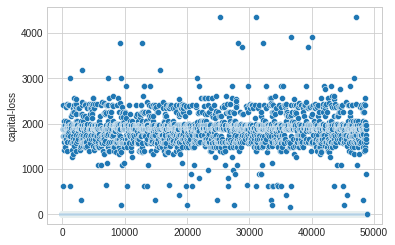

In [ ]:
sns.scatterplot(df.index, df['capital-loss'])

In [ ]:
df['capital-gain'] = df['capital-gain']+1
df['capital-loss'] = df['capital-loss']+1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


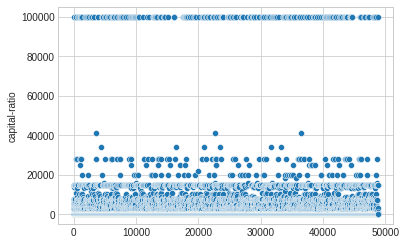

In [ ]:
df['capital-ratio'] = df['capital-gain']/df['capital-loss']
df['capital-ratio-bins'] = pd.qcut(df['capital-ratio'].rank(method='first'), 5)

sns.scatterplot(df.index, df['capital-ratio'])

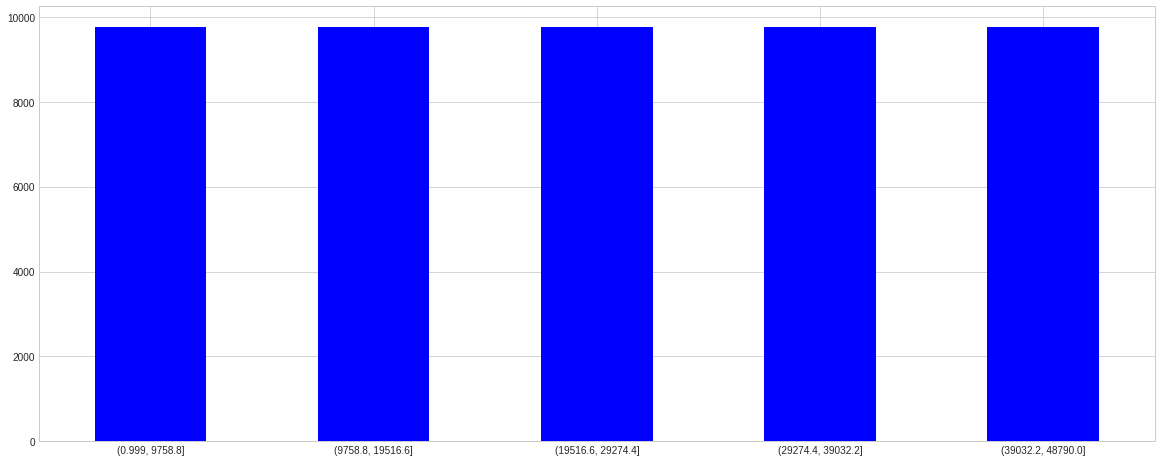

In [ ]:

df['capital-ratio-bins'].value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(20,8))

Age & hours-per-week

In [ ]:
df['age-hours'] = df['age']*df['hours-per-week']
df['age-hours-bin']  = pd.cut(df['age-hours'], 10)

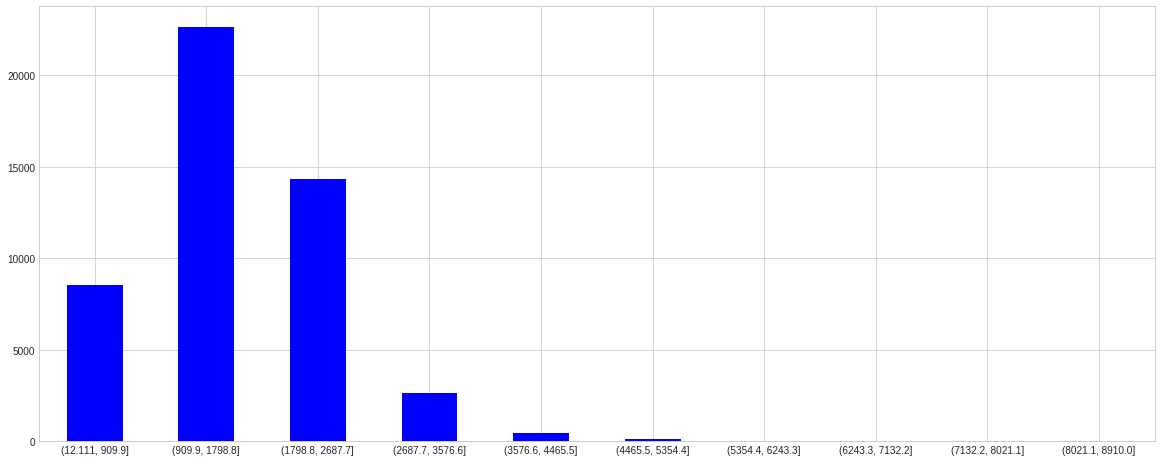

In [ ]:
df['age-hours-bin'].value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(20,8))

# Converting Categorical Features

In [ ]:
list_feature_cate= ['workclass', 'education',  'marital-status', 'occupation', 'relationship', 'race', 'gender', 'hours-per-week_bin', 'age_bin', 'age-hours-bin', 'capital-ratio-bins']

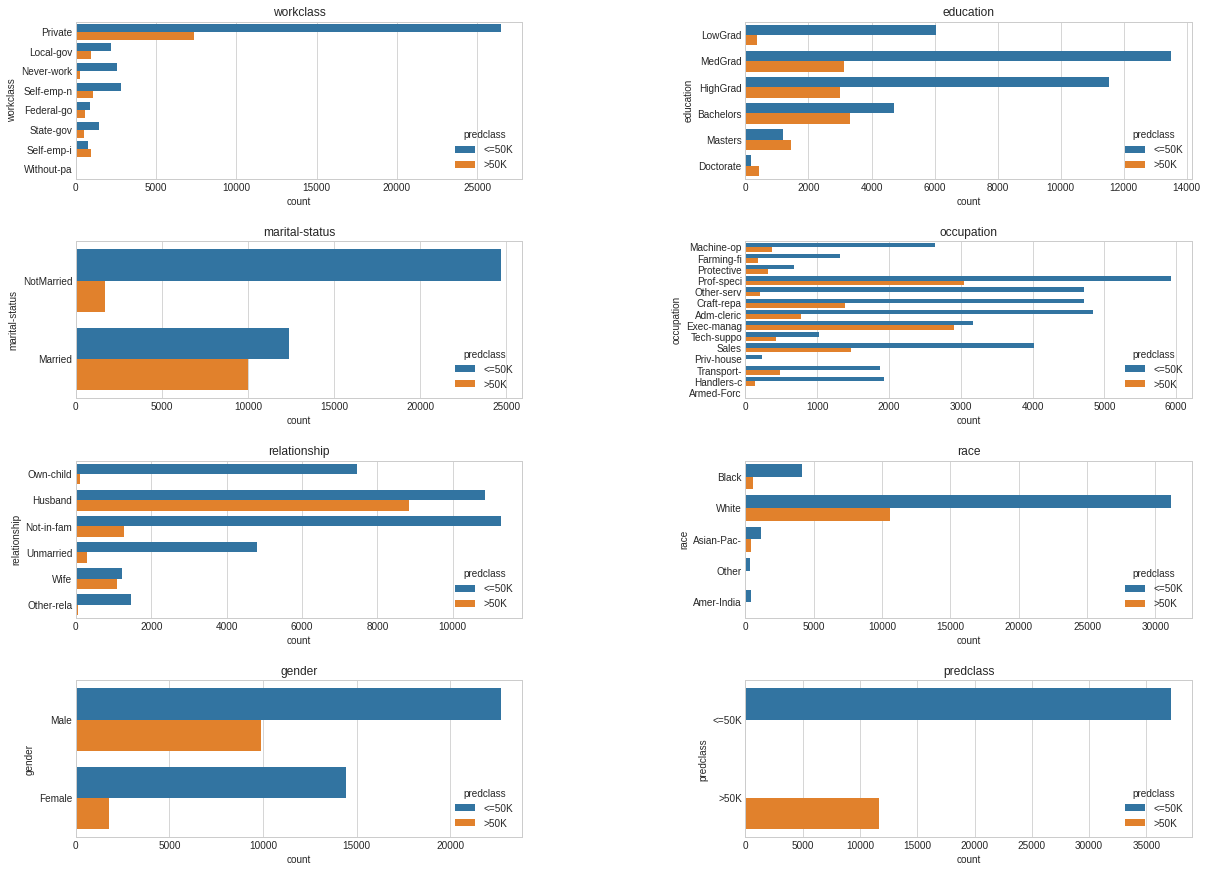

In [ ]:

df.loc[df['income'] == 1, 'predclass'] =  '>50K'
df.loc[df['income'] == 0, 'predclass'] =  '<=50K'
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = df.loc[:, ['workclass', 'education',  'marital-status', 'occupation', 'relationship', 'race', 'gender', 'hours-per-week_bin', 'age_bin', 'age-hours-bin', 'capital-ratio-bins', 'predclass']]  

plot_bivariate_bar(bivariate_df, hue='predclass', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)
df.drop(['predclass'],axis=1, inplace=True)

In [ ]:
for col in list_feature_cate:
    df_dummy = pd.get_dummies(df[col], drop_first=True)
    df.drop([col], axis=1, inplace=True)
    df = pd.concat([df, df_dummy], axis=1)


# Featrue Selection

### Numeric

In [ ]:
# X = df.drop('income',axis=1)
X = df[list_feature_num]
y = df.income
model = LogisticRegression()
sfs1 = SFS(model, 
           k_features=(1, len(X.columns) ), 
           forward=True, 
           floating=False, 
           verbose=2,
           n_jobs=-1,
           scoring='accuracy',
           cv=5)
pipe = make_pipeline(sfs1)
pipe.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.6s finished

[2021-03-23 14:06:00] Features: 1/6 -- score: 0.7998975199836031[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished

[2021-03-23 14:06:03] Features: 2/6 -- score: 0.813178930108629[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.1s finished

[2021-03-23 14:06:07] Features: 3/6 -- score: 0.8113547858167658[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.3s finished

[2021-03-23 14:06:10] Features: 4/6 -- score: 0.8114777

Pipeline(memory=None,
         steps=[('sequentialfeatureselector',
                 SequentialFeatureSelector(clone_estimator=True, cv=5,
                                           estimator=LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                                                                        

In [ ]:
print('best combination (ACC: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_idx_))


feature_selected = [X.columns[i] for i in sfs1.k_feature_idx_]
print('best feature', feature_selected)

list_feature_drop = [item for item in X.columns if item not in feature_selected]
df.drop(list_feature_drop, axis=1, inplace=True)

best combination (ACC: 0.814): (0, 2, 3, 4, 5)

best feature ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


### Category

In [ ]:
X = df.drop('income',axis=1)
# X = df[list_feature_cate]
y = df.income
model = LogisticRegression()
sfs1 = SFS(model, 
           k_features=(1, len(X.columns) ), 
           forward=True, 
           floating=False, 
           verbose=2,
           n_jobs=-1,
           scoring='accuracy',
           cv=5)
pipe = make_pipeline(sfs1)
pipe.fit(X, y)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:   18.5s finished

[2021-03-23 14:06:33] Features: 1/84 -- score: 0.7998975199836031[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:   55.9s finished

[2021-03-23 14:07:29] Features: 2/84 -- score: 0.813178930108629[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:  1.1min finished

[2021-03-23 14:08:35] Features: 3/84 -- score: 0.8142857142857144[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done  81 out of

Pipeline(memory=None,
         steps=[('sequentialfeatureselector',
                 SequentialFeatureSelector(clone_estimator=True, cv=5,
                                           estimator=LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                                                                        

In [ ]:
print('best combination (ACC: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_idx_))
feature_selected = [X.columns[i] for i in sfs1.k_feature_idx_]
print('best feature', feature_selected)

list_feature_drop = [item for item in X.columns if item not in feature_selected]
df.drop(list_feature_drop, axis=1, inplace=True)

best combination (ACC: 0.855): (1, 2, 3, 7, 8, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 38, 39, 40, 44, 46, 47, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 74, 75, 76, 77, 78, 79, 81, 82)

best feature ['educational-num', 'capital-gain', 'capital-loss', 'Local-gov', 'Never-worked', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', 'Doctorate', 'HighGrad', 'MedGrad', 'NotMarried', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving', 'Other-relative', 'Own-child', 'Asian-Pac-Islander', 'Black', 'Other', Interval(20.6, 30.4, closed='right'), Interval(40.2, 50.0, closed='right'), Interval(50.0, 59.8, closed='right'), Interval(69.6, 79.4, closed='right'), Interval(79.4, 89.2, closed='right'), Interval(89.2, 99.0, 

# Building a Logistic Regression model

## Train/Test Split

In [ ]:
# X = df[feature_selected]
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=101)

## Training and Predicting

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Test Dataset

In [ ]:
# test
confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11133
           1       0.74      0.62      0.67      3504

    accuracy                           0.86     14637
   macro avg       0.81      0.77      0.79     14637
weighted avg       0.85      0.86      0.85     14637



Train Dataset

In [ ]:
# train
y_pred_train = model.predict(X_train)
confusion_matrix(y_train, y_pred_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     25976
           1       0.72      0.63      0.67      8177

    accuracy                           0.85     34153
   macro avg       0.81      0.78      0.79     34153
weighted avg       0.85      0.85      0.85     34153



## Other Result

test dataset

In [ ]:
# test
confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11133
           1       0.75      0.60      0.67      3504

    accuracy                           0.86     14637
   macro avg       0.82      0.77      0.79     14637
weighted avg       0.85      0.86      0.85     14637



train dataset

In [ ]:
# train
y_pred_train = model.predict(X_train)
confusion_matrix(y_train, y_pred_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     25976
           1       0.74      0.61      0.67      8177

    accuracy                           0.85     34153
   macro avg       0.81      0.77      0.79     34153
weighted avg       0.85      0.85      0.85     34153



feature drop

*   native-country



feture select by SFS

In [ ]:
feature_selected

['educational-num',
 'capital-gain',
 'capital-loss',
 'Local-gov',
 'Never-worked',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Without-pay',
 'Doctorate',
 'HighGrad',
 'MedGrad',
 'NotMarried',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving',
 'Other-relative',
 'Own-child',
 'Asian-Pac-Islander',
 'Black',
 'Other',
 Interval(20.6, 30.4, closed='right'),
 Interval(40.2, 50.0, closed='right'),
 Interval(50.0, 59.8, closed='right'),
 Interval(69.6, 79.4, closed='right'),
 Interval(79.4, 89.2, closed='right'),
 Interval(89.2, 99.0, closed='right'),
 Interval(20.65, 24.3, closed='right'),
 Interval(24.3, 27.95, closed='right'),
 Interval(27.95, 31.6, closed='right'),
 Interval(31.6, 35.25, closed='right'),
 Interval(38.9, 42.55, closed='right'),
 Interval(42.55, 46.2, closed='right'),
